#### Load Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import MarkerCluster

In [2]:
#Create a DataFrame
tanz = pd.read_csv('training.csv')

In [3]:
tanz.head(3)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2


### Rename columns accordingly

In [4]:
tanz=tanz.rename(columns ={'Q1':'Age',
                           'Q2':'Gender',
                           'Q3':'Marital_status',
                           'Q4':'Level_of_education',
                           'Q5':'Land_ownership',
                           'Q6':'Other_land_ownership',
                           'Q7':'Owning_a_mobile_phone',
                           'Q9':'Employer',
                           'Q10':'Product_sold',
                           'Q11':'Service_provided',
                           'Q13':'sending_money_out_date',
                           'Q15':'recent_date_money_recieved',
                           'Q14':'cash_recieved_non_domestically',
                           'Q16':'purchasing_frequency_for_using_mobile_money',
                           'Q17':'bill_frequency_for_using_mobile_money',
                           'Q18':'Literacy_in_Kiswhahili',
                           'Q19':'English_literacy',
                           'Q8_1':'Salaries',
                           "Q8_2":'Trading',
                           'Q8_3':'Service',
                           'Q8_4':'Casual_work',
                           'Q8_5':'Rental',
                           'Q8_6':'Interest',
                           'Q8_7':'Pension',
                           'Q8_8':'Social_welfare',
                           'Q8_9':'Dependent',
                           'Q8_10':'Dont_get_money',
                           'Q8_11':'Other'
                              })

gen={1:'Male',2:'Female'}
tanz['Gender']=tanz.Gender.map(gen)

mm = {0:'no mobile and no service',1:'no mobile and atleast one service',2:'mobile only',3:'mobile and atleast one service'}
tanz['mobile_money_classification']=tanz.mobile_money_classification.map(mm)

time_period = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['sending_money_out_date']=tanz.sending_money_out_date.map(time_period)

received = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['recent_date_money_recieved']=tanz.recent_date_money_recieved.map(received)

In [5]:
tanz.head(3)

,ID,Age,Gender,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,...,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,Female,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,no mobile and no service
1,1258,40,Male,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,mobile and atleast one service
2,331,18,Female,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,mobile only


### Data Inspection

#### Examining Dataset for any missing values

In [6]:
tanz.isnull().sum()

ID                                             0
Age                                            0
Gender                                         0
Marital_status                                 0
Level_of_education                             0
Land_ownership                                 0
Other_land_ownership                           0
Owning_a_mobile_phone                          0
Salaries                                       0
Trading                                        0
Service                                        0
Casual_work                                    0
Rental                                         0
Interest                                       0
Pension                                        0
Social_welfare                                 0
Dependent                                      0
Dont_get_money                                 0
Other                                          0
Employer                                       0
Product_sold        

Our dataset doesn't have any missing values. Everything is accounted for

In [7]:
tanz.describe()

,ID,Age,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,Service,...,purchasing_frequency_for_using_mobile_money,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,...,1.951508,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,...,1.580819,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000
max,9459.000000,100.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000


From this table we can see the number of observations (count), the mean,standard deviation,min&max and percentiles for each column.

## Visual EDA

#### Financial services accessed.

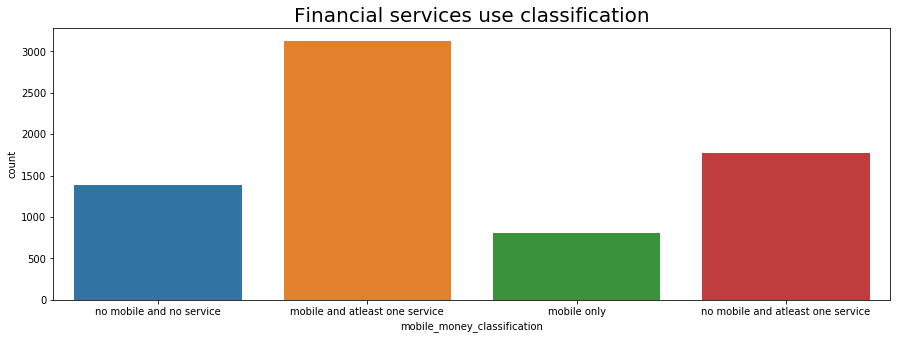

In [8]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='mobile_money_classification',data=tanz)
plt.title('Financial services use classification', fontdict=fontdict)
plt.show()


In [9]:
tanz['mobile_money_classification'].value_counts()

mobile and atleast one service       3126
no mobile and atleast one service    1778
no mobile and no service             1386
mobile only                           804
Name: mobile_money_classification, dtype: int64

In [10]:
3126 - 1386

1740

The plot above shows that most people use mobile and atleast one other financial service. That's 1740 more than people who use neither.

In [11]:
# sns.scatterplot(x="Age", y="mobile_money_classification", hue="mobile_money", palette="ch:r=-.5,l=.75", data=tanz);

### Financial services classification and Age

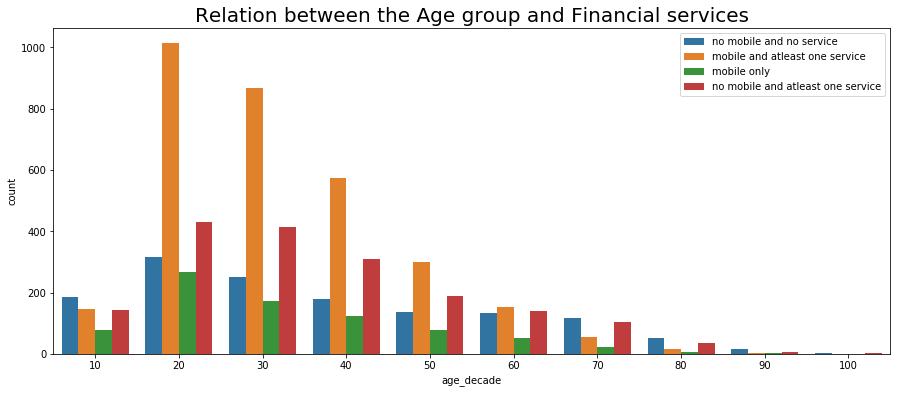

In [12]:
tanz['age_decade']=tanz.Age.apply(lambda x : int(x/10)*10)
plt.figure(figsize=(15,6))
fontdict={'fontsize':20}
sns.countplot(x='age_decade',hue='mobile_money_classification',data = tanz)
plt.legend(loc='upper right')
plt.title('Relation between the Age group and Financial services',fontdict=fontdict)
plt.show()

People within the 20 & 30 year old age group mostly use mobile money and another financial service. This trend decreases as the population gets older.

### Financial services classification and Gender

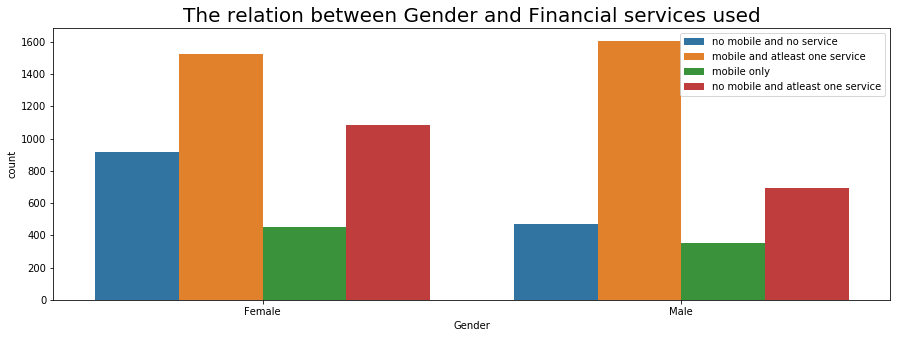

In [13]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Gender',hue='mobile_money_classification',data=tanz)
plt.legend(loc='upper right')
plt.title('The relation between Gender and Financial services used',fontdict=fontdict)
plt.show()

Both Females & Males use mobile money and at least one other financial service. Males use it a bit more than females, however females use more mobile money only than males.

### Financial services classification and Marital Status

In [14]:
status = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
tanz['Marital_status']=tanz.Marital_status.map(status)

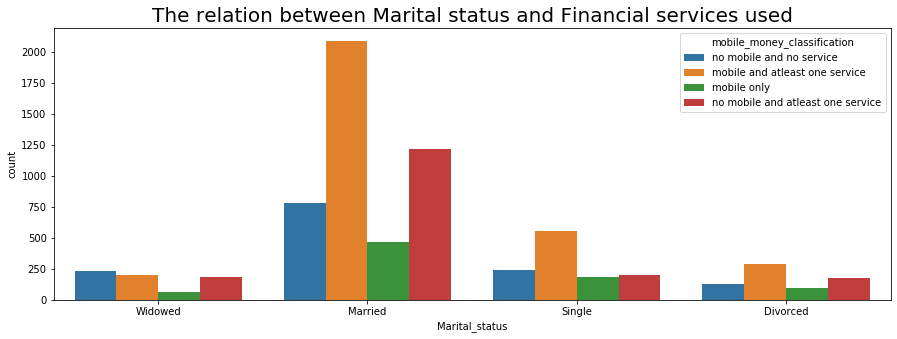

In [15]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=tanz)
plt.title('The relation between Marital status and Financial services used',fontdict=fontdict)
plt.show()

Married people have the highest occurence of using mobile money and at least one other service. This could be attributed to the increased responsibility of joint living and family obligations.

### Financial services classification and Land ownership

In [16]:
land = {1:'Yes',2:'No'}
tanz['Other_land_ownership']=tanz.Other_land_ownership.map(land)

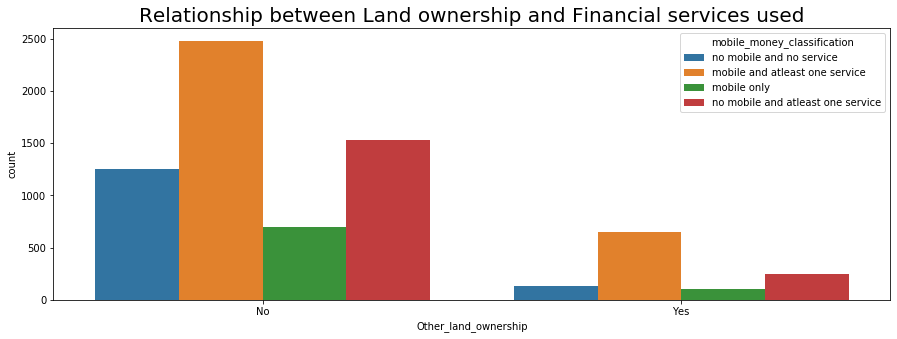

In [17]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=tanz)
plt.title('Relationship between Land ownership and Financial services used',fontdict=fontdict)
plt.show()

###  Financial services classification and the Types of income

In [18]:
df_inc = tanz[['Salaries', 'Trading', 'Service', 'Casual_work', 'Rental', 'Interest', 
                            'Pension', 'Social_welfare', 'Dependent', 'Dont_get_money', 'Other',
              'mobile_money', 'mobile_money_classification']]

In [19]:
df_other = pd.melt(df_inc, id_vars=['mobile_money_classification', 'mobile_money'],
                   var_name='Type of Income', value_name='val')

In [20]:
df_other.head(3)

,mobile_money_classification,mobile_money,Type of Income,val
0,no mobile and no service,0,Salaries,0
1,mobile and atleast one service,1,Salaries,1
2,mobile only,1,Salaries,0


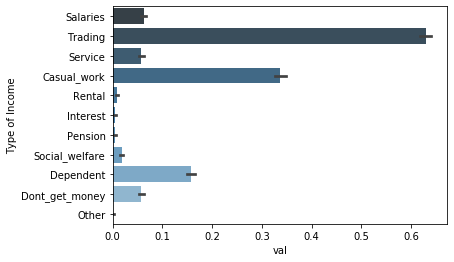

In [21]:
ax = sns.barplot("val", y="Type of Income", data=df_other,
                 palette="Blues_d")

In [22]:
data_frame = tanz[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]

## How often are mobile money services used?

### How often  Mobile money services are used  and Age

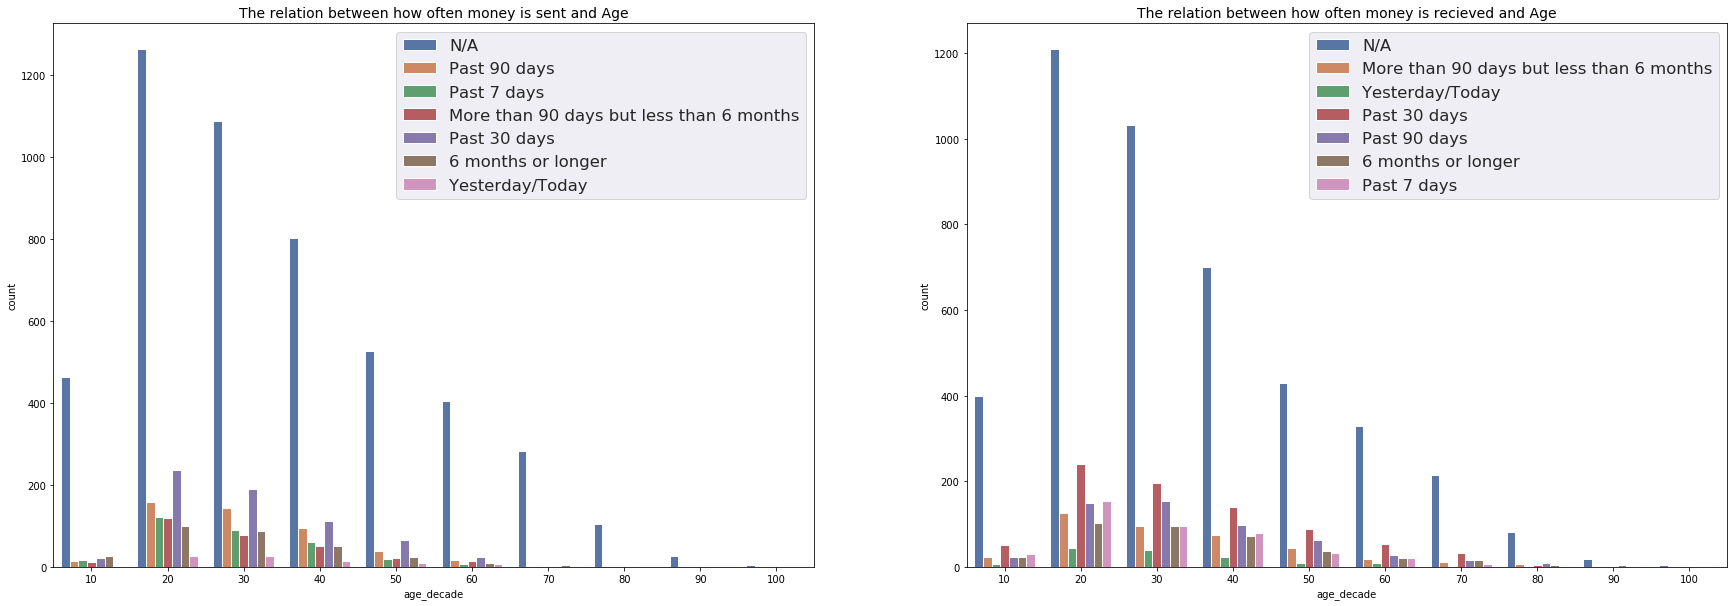

In [24]:
f, axes = plt.subplots(1, 2,figsize=(30, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1.5)
sns.countplot(x='age_decade',hue='sending_money_out_date',data=tanz, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=tanz,ax =axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and Age',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Age',fontdict=fontdict)
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

###  How often  Mobile money services are used  and Gender

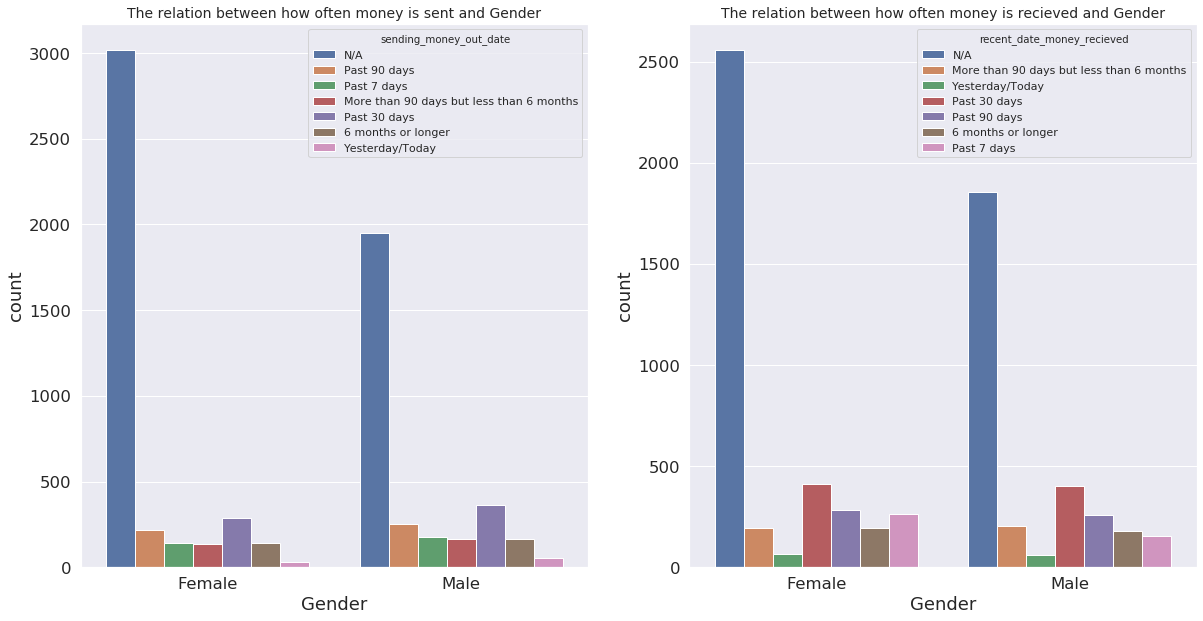

In [25]:
f, axes = plt.subplots(1, 2,figsize=(20, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Gender',hue='sending_money_out_date',data=tanz, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=tanz,ax = axes[1])
axes[0].set_title('The relation between how often money is sent and Gender',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Gender',fontdict=fontdict)
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

###   How often  Mobile money services are used and Maritul status


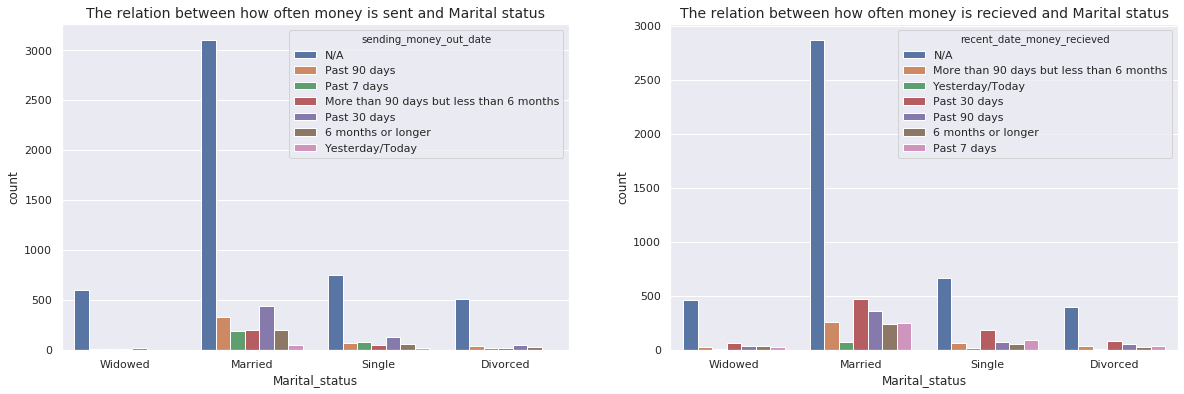

In [26]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Marital status',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Marital status',fontdict=fontdict)
fontdict={'fontsize': 20,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
plt.show()


*Mostly married people sent and recieved money in the past 30 days.*

### How often  Mobile money services are used  and Land ownership

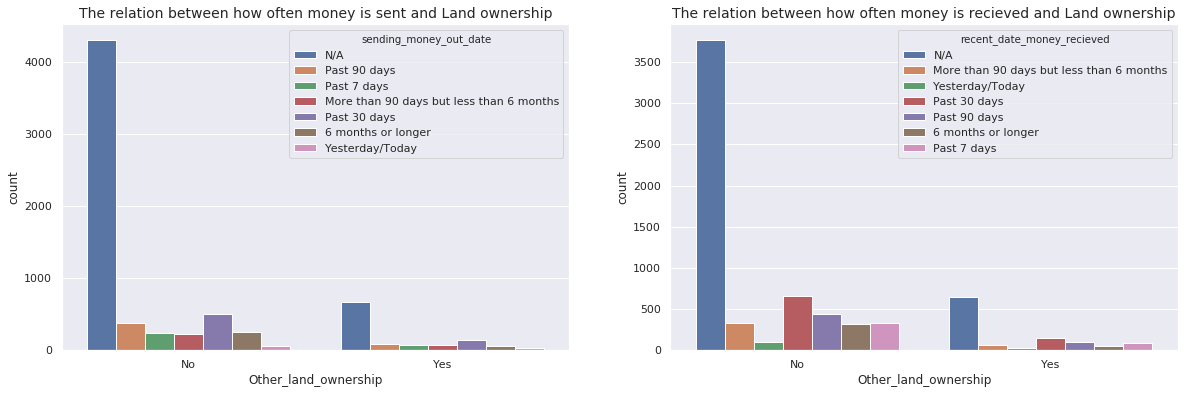

In [27]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Land ownership',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Land ownership',fontdict=fontdict)
plt.show()


### How often  Mobile money services are used  and  the Type of income

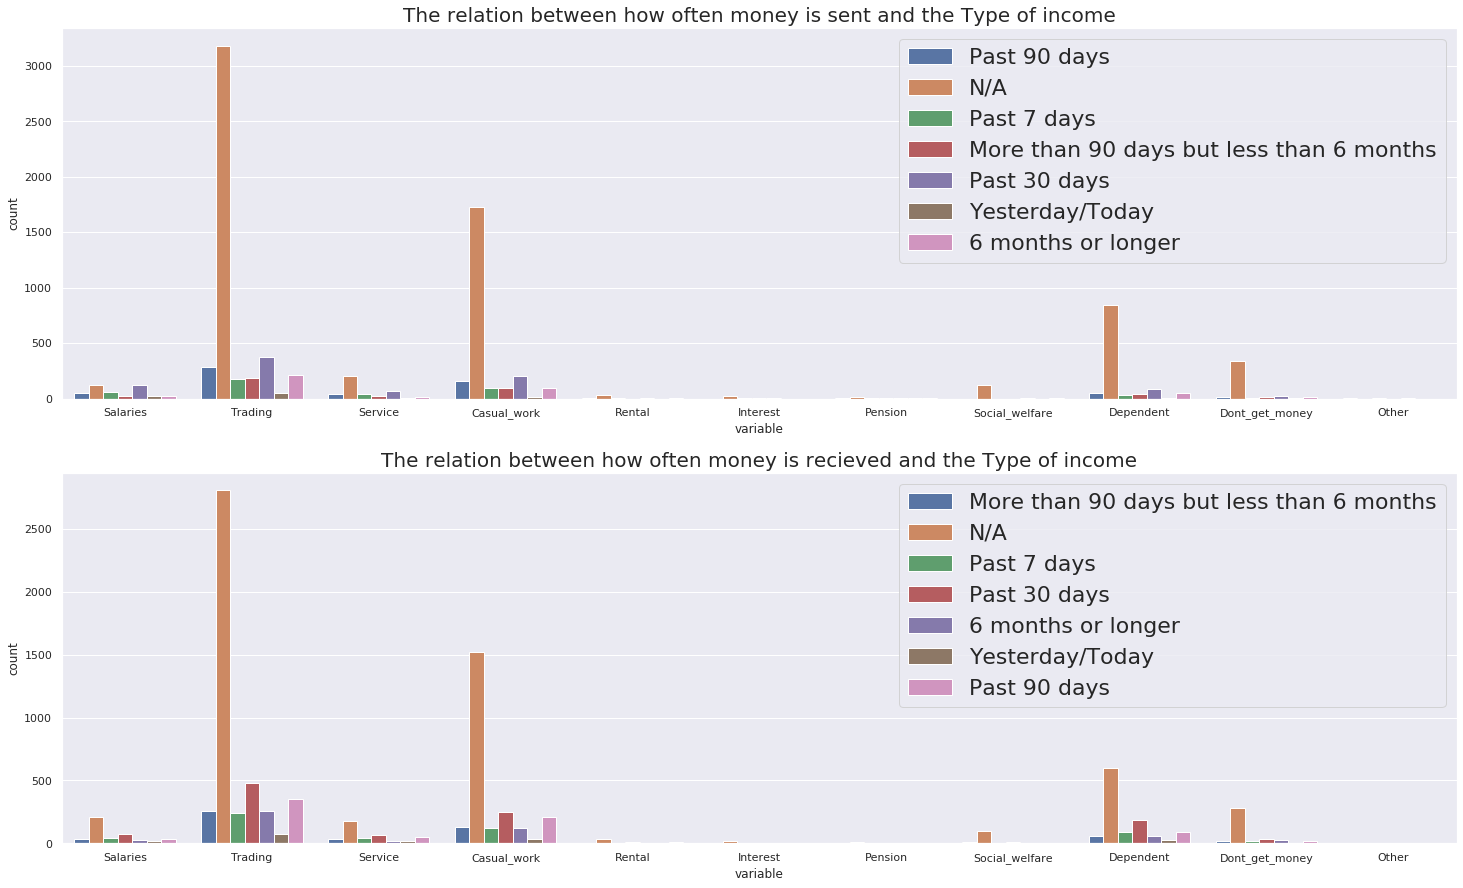

In [28]:
f, axes = plt.subplots(2, 1,figsize=(25, 15))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and the Type of income',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and the Type of income',fontdict=fontdict)

plt.show()

## 6.Demographic factors associated with mobile money

In [29]:
a = {1:'Yes',2:'No'}
tanz['Owning_a_mobile_phone']=tanz.Owning_a_mobile_phone.map(a)

In [30]:
b ={-1:'N/A',1:'crops',2:'livestock product',3:'livestock',4:'aquaculture',
            5:'Agriculture products',6:'Non agriculture',7:'crafts',8:'collection',9:'processed',10:'other'}
tanz['Product_sold']=tanz.Product_sold.map(b)

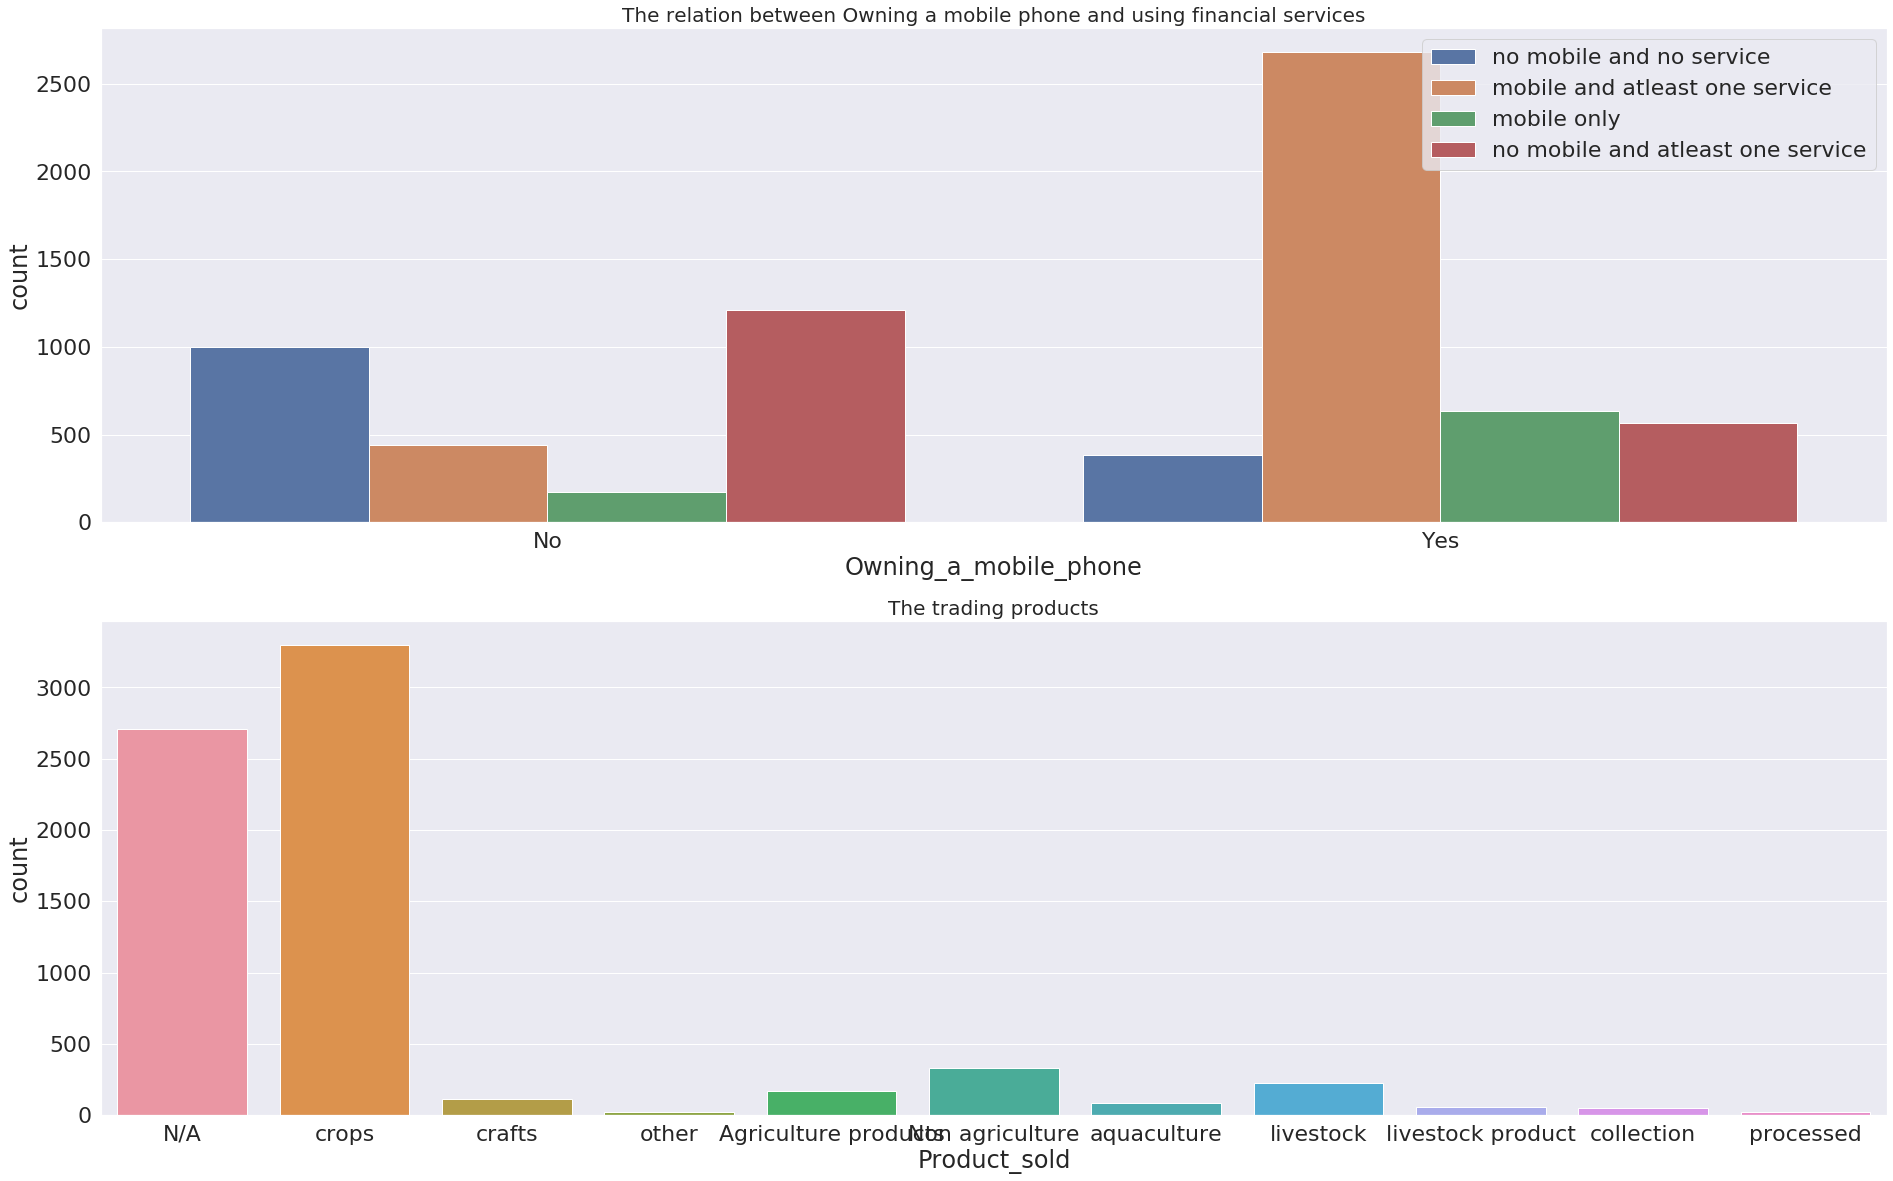

In [31]:
f, axes = plt.subplots(2, 1,figsize=(32, 20))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=tanz,ax=axes[0])
sns.countplot(x='Product_sold',data=tanz,ax= axes[1])
axes[0].legend(loc='upper right')
axes[0].set_title('The relation between Owning a mobile phone and using financial services',fontdict=fontdict)
axes[1].set_title('The trading products',fontdict=fontdict)
plt.show()



In [32]:
c ={1:'no formal education',2:'some primary',3:'primary completed',
           4:'post primary',5:'some secondary',6:'higher education',7:'do not know'}
tanz['Level_of_education']=tanz.Level_of_education.map(c)

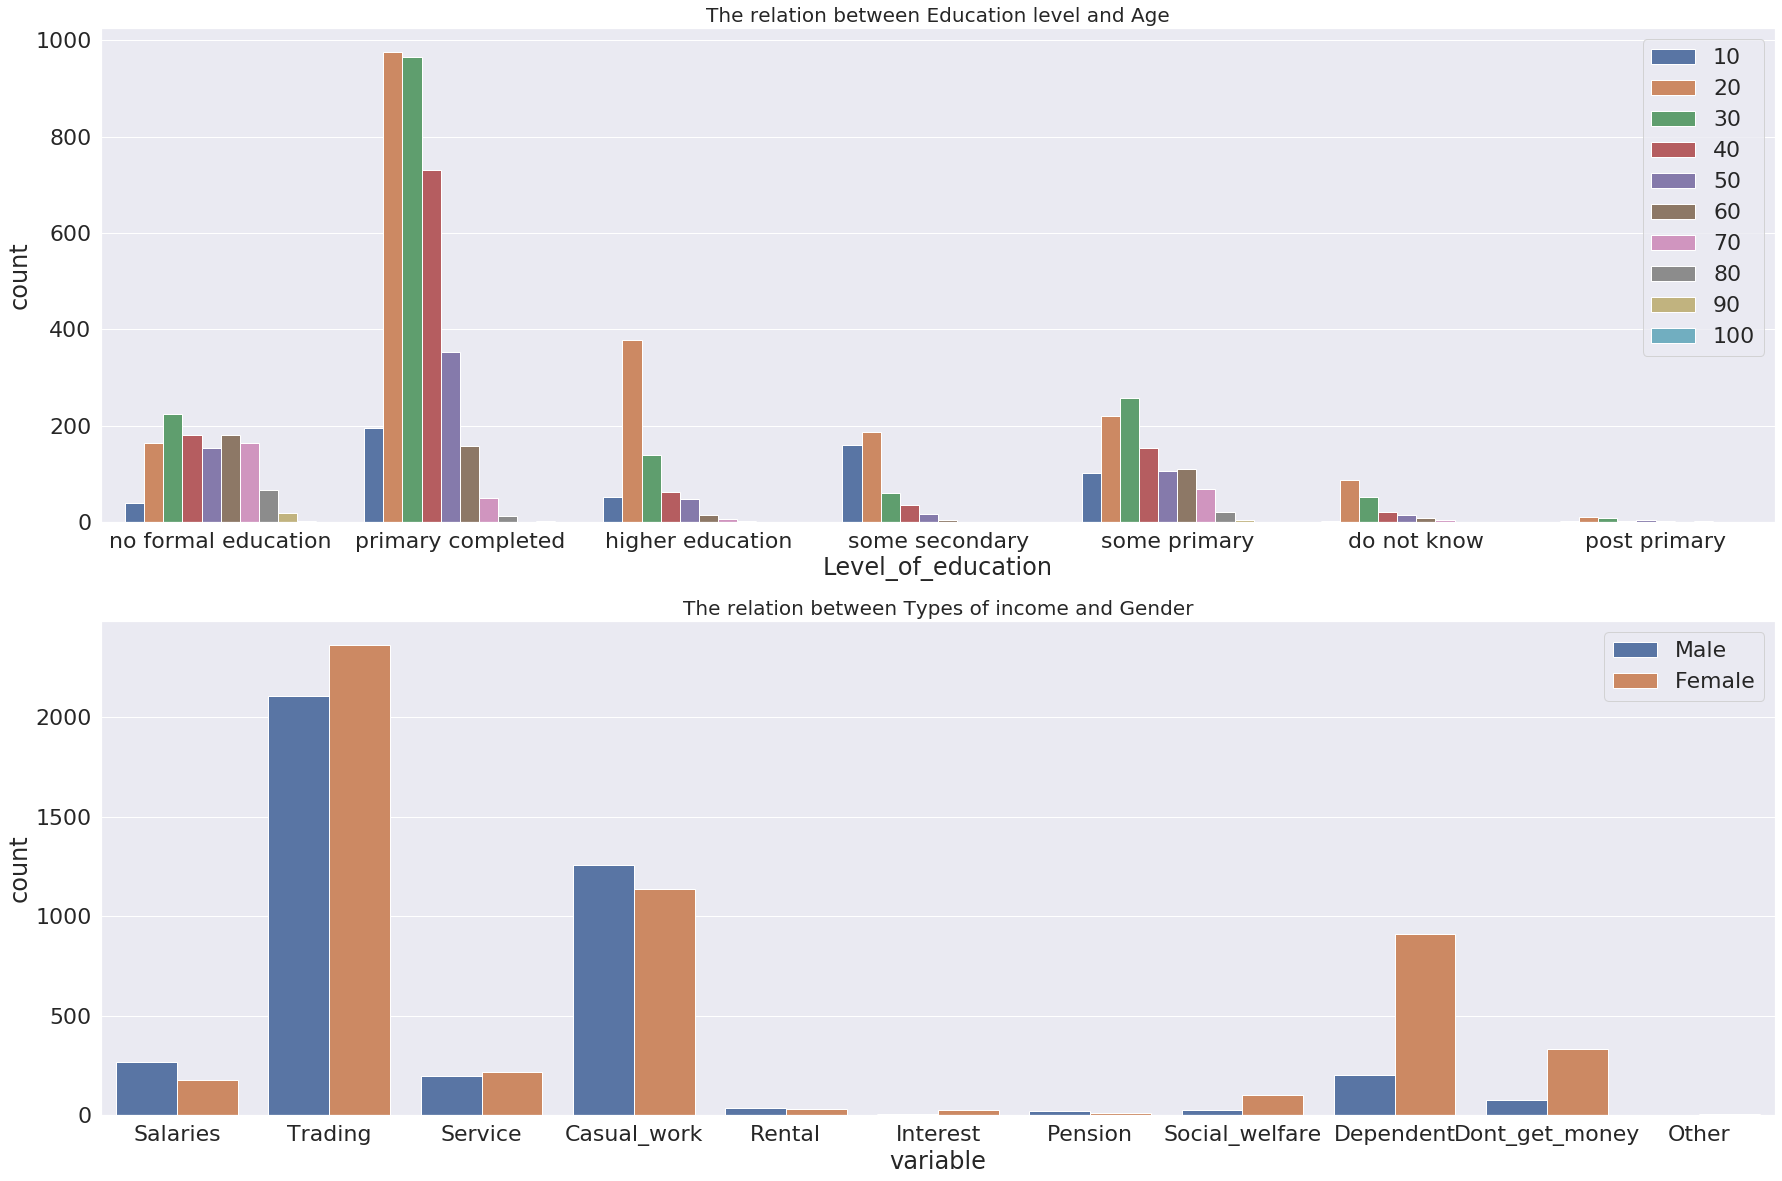

In [33]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize':20}
sns.set(font_scale=2)
sns.countplot(x='Level_of_education',hue='age_decade',data=tanz,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between Education level and Age',fontdict=fontdict)
axes[1].set_title('The relation between Types of income and Gender',fontdict=fontdict)
plt.show()

In [34]:
trading_data = tanz[(tanz["mobile_money"] == 1) & (tanz["Trading"] == 1) | (tanz["Casual_work"] == 1)  | (tanz["Salaries"] == 1) |(tanz["Service"] == 1)  |(tanz["Rental"] == 1) |(tanz["Interest"] == 1) |(tanz["Pension"] == 1)|(tanz["Social_welfare"] == 1)|(tanz["Dependent"] == 1)|(tanz["Dont_get_money"] == 1)|(tanz["Other"] == 1)]
trading_map = folium.Map(location=[-6.161184, 35.745426], zoom_start=6)
marker_cluster = MarkerCluster().add_to(trading_map)
for lat, long in zip(trading_data.Latitude, trading_data.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)

trading_map

## Conclusion about the use of financial services in Tanzania 
#### Which demographic and geographic factors are associated with mobile money use?

Deductions:

- 3132 people use mobile money plus additional services
- Married people use the most amount of mobile money. Just to reiterate a point I made before this can be attributed to the increased responsibility of joint living and family obligations.
- The most income comes from Trading and it seems most trading takes place around the coast. The reason behind this could be that most people are involved in agriculture.
- The mobile money services are mostly used by people who are in their 20s. These are the people who mostly have smartphones & have the means & access.
- Males use mobile money and at least one other financial service.The reason for this could be that males are more involved in agriculture than women.